In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Semster 2/Intro to ML/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
from sklearn.cluster import KMeans
wcss = [] #WCSS stands for Withitn Cluster Sum of Square. It is sum of squared distance each point and centroid in the cluster.

In [ ]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = "k-means++")
    kmeans.fit(df.iloc[:,3:])
    wcss.append(kmeans.inertia_)
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37239.835542456036,
 30259.65720728547,
 25036.417604033988,
 21826.93630323166,
 19710.03027166079]

Text(0.5, 1.0, 'Elbow Method')

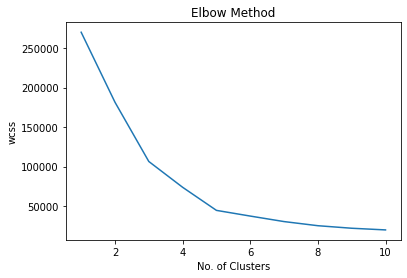

In [ ]:
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")
plt.title("Elbow Method")

In [ ]:
km = KMeans(n_clusters = 5)
km.fit(df.iloc[:,3:])
y_pred = km.predict(df.iloc[:,3:])
df["cluster"] = y_pred

In [ ]:
df0 = df[df["cluster"]==0]
df1 = df[df["cluster"]==1]
df2 = df[df["cluster"]==2]
df3 = df[df["cluster"]==3]
df4 = df[df["cluster"]==4]

Text(0.5, 1.0, 'Customer Segments')

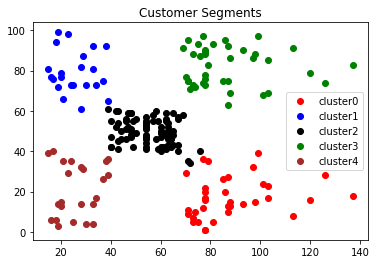

In [ ]:
plt.scatter(df0["Annual Income (k$)"],df0["Spending Score (1-100)"],c="red",label="cluster0")
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],c="blue",label="cluster1")
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],c="black",label="cluster2")
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],c="green",label="cluster3")
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],c="brown",label="cluster4")
plt.legend()
plt.title("Customer Segments")